In [2]:
# We import here libraries that we'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



In [5]:

df = pd.read_excel(r'./../data/creditcardmarketing.xlsx') # import the excel file using a relative path to the 'data' folder


## Explore and clean data

In [3]:
df.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [6]:
df.shape

(18000, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [8]:
cols = [col_name.lower().replace(' ', '_') for col_name in df.columns]

In [9]:
df.columns = cols

In [10]:
df.isna().sum()

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
#_bank_accounts_open     0
overdraft_protection     0
credit_rating            0
#_credit_cards_held      0
#_homes_owned            0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

In [11]:
df_target = df.copy()

In [17]:
counts = df['offer_accepted'].value_counts()

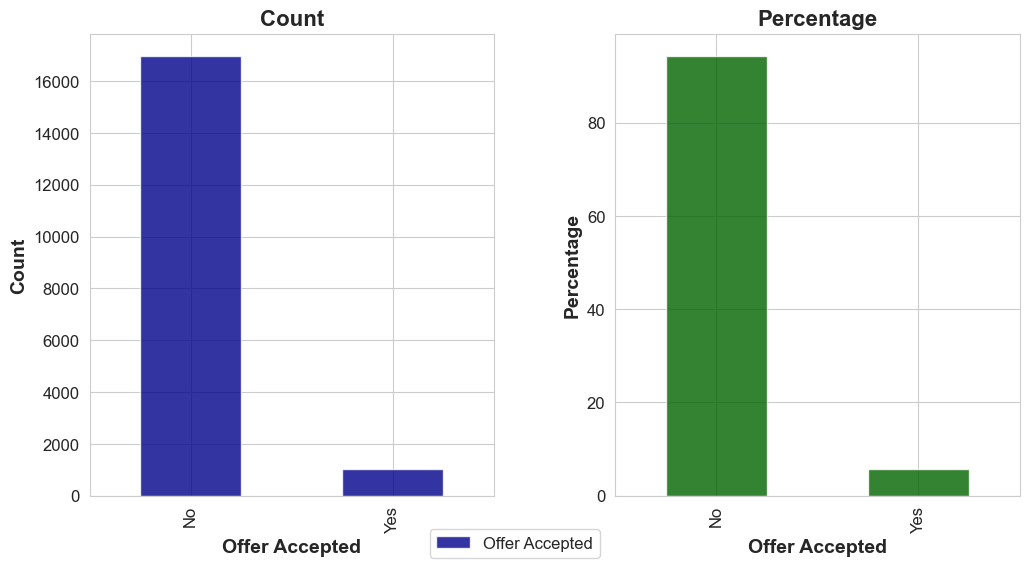

In [18]:
# Compute the count of each category
counts = df['offer_accepted'].value_counts()

# Compute the percentage of each category
percentages = df['offer_accepted'].value_counts(normalize=True) * 100

# Create a grid of two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Set the style using seaborn
sns.set_style("whitegrid")

# Plot the count of each category in the first subplot
counts.plot(kind='bar', ax=ax1, color='darkblue', alpha=0.8)
ax1.set_title('Count', fontsize=16, fontweight='bold')
ax1.set_xlabel('Offer Accepted', fontsize=14, fontweight='bold')
ax1.set_ylabel('Count', fontsize=14, fontweight='bold')
ax1.tick_params(axis='both', labelsize=12)

# Plot the percentage of each category in the second subplot
percentages.plot(kind='bar', ax=ax2, color='darkgreen', alpha=0.8)
ax2.set_title('Percentage', fontsize=16, fontweight='bold')
ax2.set_xlabel('Offer Accepted', fontsize=14, fontweight='bold')
ax2.set_ylabel('Percentage', fontsize=14, fontweight='bold')
ax2.tick_params(axis='both', labelsize=12)

# Add a legend
fig.legend(labels=['Offer Accepted'], loc='lower center', ncol=1, fontsize=12)

# Add some space between the subplots
fig.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


In [19]:
mean_balance = df['average_balance'].mean()
print(mean_balance)

940.5155624165554


In [20]:
cat_df = df.select_dtypes(include=['object'])


In [21]:
cat_df.head()

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,No,Air Miles,Letter,High,No,High,No
1,No,Air Miles,Letter,Medium,No,Medium,Yes
2,No,Air Miles,Postcard,High,No,Medium,Yes
3,No,Air Miles,Letter,Medium,No,High,No
4,No,Air Miles,Letter,Medium,No,Medium,Yes


In [22]:
# Use pandas get_dummies to create binary indicators for each category
encoded_df = pd.get_dummies(cat_df)




In [23]:
# Use pandas get_dummies to create binary indicators for each category
encoded_df.head()

# Concatenate the encoded dataframe with the original dataframe
new_df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns
new_df = new_df.drop(columns=cat_df.columns)

# Print the first 5 rows of the new dataframe
print(new_df.head())

   customer_number  #_bank_accounts_open  #_credit_cards_held  #_homes_owned  \
0                1                     1                    2              1   
1                2                     1                    2              2   
2                3                     2                    2              1   
3                4                     2                    1              1   
4                5                     1                    2              1   

   household_size  average_balance  q1_balance  q2_balance  q3_balance  \
0               4          1160.75      1669.0       877.0      1095.0   
1               5           147.25        39.0       106.0        78.0   
2               2           276.50       367.0       352.0       145.0   
3               4          1219.00      1578.0      1760.0      1119.0   
4               6          1211.00      2140.0      1357.0       982.0   

   q4_balance  ...  income_level_High  income_level_Low  income_level_Medi

In [24]:
# Calculate the correlation matrix
corr_matrix = df.corr()



/var/folders/3j/86p9cls9769dx1txzr_9kc940000gn/T/ipykernel_9563/3071731787.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [25]:
corr_matrix.head()

,customer_number,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
customer_number,1.000000,-0.004617,-0.008215,-0.002828,0.006111,0.009357,0.012216,0.011570,0.006401,-0.005901
#_bank_accounts_open,-0.004617,1.000000,-0.001728,0.004772,0.008479,-0.003909,-0.002814,-0.007956,0.000190,-0.000356
#_credit_cards_held,-0.008215,-0.001728,1.000000,-0.002547,-0.003074,-0.003469,-0.009446,-0.007373,-0.007623,0.015362
#_homes_owned,-0.002828,0.004772,-0.002547,1.000000,0.005304,0.017967,0.013143,0.009758,0.007775,0.014775
household_size,0.006111,0.008479,-0.003074,0.005304,1.000000,-0.003582,-0.005080,-0.008766,0.003633,0.000232


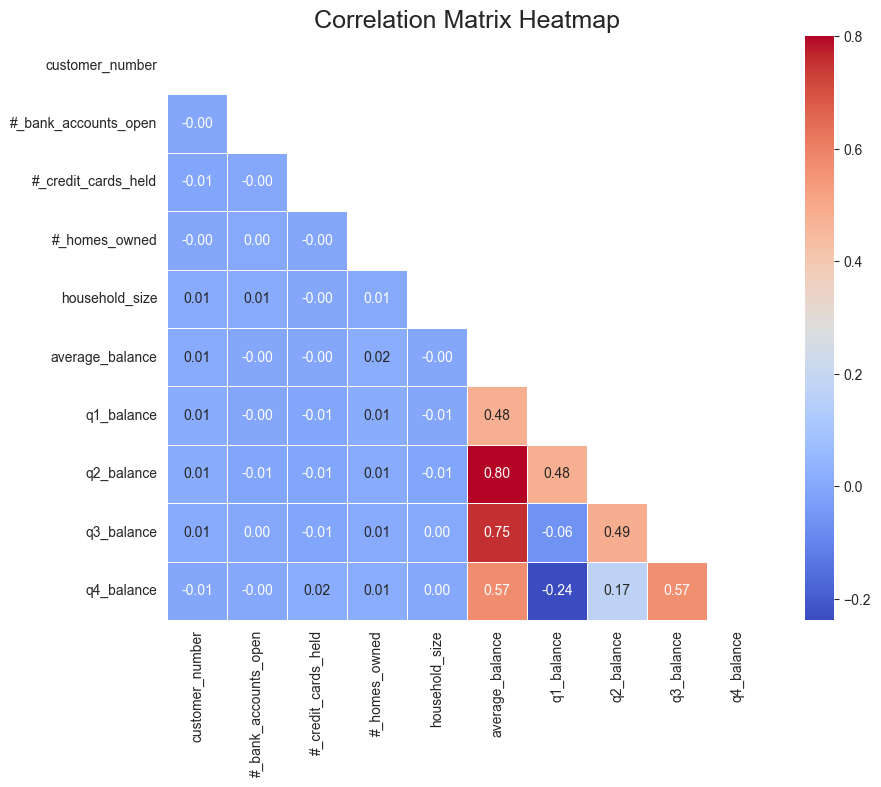

In [26]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap using the mask
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5, ax=ax)

# Add a title and adjust the margins
plt.title('Correlation Matrix Heatmap', fontsize=18)
plt.subplots_adjust(left=0.15, bottom=0.15)

# Show the plot
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('offer_accepted', axis=1)
y = df_encoded['offer_accepted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'df_encoded' is not defined